In [23]:
import numpy as np
import pandas as pd

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 미세먼지

In [25]:
##데이터 합치는 임시 셀
# CSV 파일 경로
file1 = '/content/drive/MyDrive/SWING/HOMERUN/temp/temp1.csv'
file2 = '/content/drive/MyDrive/SWING/HOMERUN/temp/temp2.csv'
file3 = '/content/drive/MyDrive/SWING/HOMERUN/temp/temp3.csv'
file4 = '/content/drive/MyDrive/SWING/HOMERUN/temp/temp4.csv'

# CSV 파일 읽기
df1 = pd.read_csv(file1)
df1 = df1[::-1]
df2 = pd.read_csv(file2)
df2 = df2[::-1]
df3 = pd.read_csv(file3)
df3 = df3[::-1]
df4 = pd.read_csv(file4)
df4 = df4[::-1]

# 데이터프레임 합치기
combined_df = pd.concat([df1, df2, df3, df4])
combined_df = combined_df.reset_index(drop=True)
# 합쳐진 데이터프레임 출력
# print(combined_df)
len(combined_df)
combined_df

,date,name,PM10,PM2.5,O3,NO2,CO,SO2
0,2023-01-01,중랑구,52.0,39.0,0.0210,0.0300,0.70,0.0030
1,2023-01-01,중구,54.0,46.0,0.0260,0.0230,0.60,0.0040
2,2023-01-01,종로구,53.0,42.0,0.0250,0.0220,0.70,0.0040
3,2023-01-01,은평구,55.0,37.0,0.0230,0.0210,0.80,0.0040
4,2023-01-01,용산구,50.0,37.0,0.0240,0.0190,0.60,0.0040
...,...,...,...,...,...,...,...,...
4753,2023-07-02,강서구,19.0,12.0,0.0329,0.0121,0.38,0.0027
4754,2023-07-02,강북구,24.0,15.0,0.0369,0.0051,0.34,0.0021
4755,2023-07-02,강동구,22.0,15.0,0.0344,0.0105,0.36,0.0024
4756,2023-07-02,강남구,21.0,15.0,0.0431,0.0132,0.33,0.0031


In [51]:
# unique_values = combined_df['date'].unique()
# len(unique_values)
# unique_values

In [45]:
combined_df.head()

,date,name,PM10,PM2.5,O3,NO2,CO,SO2
0,2023-01-01,중랑구,52.0,39.0,0.021,0.030,0.7,0.003
1,2023-01-01,중구,54.0,46.0,0.026,0.023,0.6,0.004
2,2023-01-01,종로구,53.0,42.0,0.025,0.022,0.7,0.004
3,2023-01-01,은평구,55.0,37.0,0.023,0.021,0.8,0.004
4,2023-01-01,용산구,50.0,37.0,0.024,0.019,0.6,0.004


In [46]:
combined_df = combined_df.rename(columns={'date': 'Date', 'name':'Gu'})

In [47]:
combined_df.head()

,Date,Gu,PM10,PM2.5,O3,NO2,CO,SO2
0,2023-01-01,중랑구,52.0,39.0,0.021,0.030,0.7,0.003
1,2023-01-01,중구,54.0,46.0,0.026,0.023,0.6,0.004
2,2023-01-01,종로구,53.0,42.0,0.025,0.022,0.7,0.004
3,2023-01-01,은평구,55.0,37.0,0.023,0.021,0.8,0.004
4,2023-01-01,용산구,50.0,37.0,0.024,0.019,0.6,0.004


In [134]:
combined_df.to_csv('seoul_air.csv', index=True)

In [27]:
combined_df.isnull().sum()

date       0
name       0
PM10      55
PM2.5     50
O3        46
NO2       50
CO       148
SO2       90
dtype: int64

In [28]:
combined_df.shape

(4758, 8)

In [54]:
unique_values = combined_df['Gu'].unique()
# len(unique_values)
unique_values

array(['중랑구', '중구', '종로구', '은평구', '용산구', '영등포구', '양천구', '송파구', '성북구',
       '성동구', '서초구', '서대문구', '마포구', '동작구', '동대문구', '도봉구', '노원구', '금천구',
       '구로구', '광진구', '관악구', '강서구', '강북구', '강동구', '강남구', '평균'],
      dtype=object)

In [55]:
# 기간별(23년 일별) 구별 PM10 df
grouped_combined_df = combined_df.groupby(['Date', 'Gu'], as_index = False)['PM10'].sum()
grouped_combined_df.head()

,Date,Gu,PM10
0,2023-01-01,강남구,52.0
1,2023-01-01,강동구,56.0
2,2023-01-01,강북구,51.0
3,2023-01-01,강서구,62.0
4,2023-01-01,관악구,54.0


In [133]:
grouped_combined_df.to_csv('seoul_PM10.csv', index=True)

# 강우량

In [110]:
df = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/rainfall.csv')

In [111]:
# #
# tempdf = pd.read_csv('/content/drive/MyDrive/SWING/HOMERUN/FineParticles.csv')

In [112]:
seoulRain = df.copy()
# seoulRain.tail()

In [113]:
unique_values = seoulRain['자료수집 시각'].unique()
len(unique_values)
unique_values

array(['2023-07-12 23:49', '2023-07-12 23:39', '2023-07-12 23:29', ...,
       '2023-06-01 00:19', '2023-06-01 00:09', '2020-10-16 10:09'],
      dtype=object)

In [114]:
columns = ['구청명', '10분우량', '자료수집 시각']
seoulRain = df[columns]

In [115]:
# seoulRain.head()

In [117]:
# seoulRain.shape

In [118]:
seoulRain = seoulRain.rename(columns={'구청명': 'Gu', '10분우량':'DailyRain'})
seoulRain.head()

,Gu,DailyRain,자료수집 시각
0,용산구,0.0,2023-07-12 23:49
1,송파구,0.0,2023-07-12 23:49
2,동대문구,0.0,2023-07-12 23:49
3,강서구,0.0,2023-07-12 23:49
4,성동구,0.0,2023-07-12 23:49


In [119]:
seoulRain['자료수집 시각'] = seoulRain['자료수집 시각'].apply(lambda x: x[:10])
seoulRain.head()

,Gu,DailyRain,자료수집 시각
0,용산구,0.0,2023-07-12
1,송파구,0.0,2023-07-12
2,동대문구,0.0,2023-07-12
3,강서구,0.0,2023-07-12
4,성동구,0.0,2023-07-12


In [120]:
seoulRain = seoulRain.rename(columns={'자료수집 시각': 'Date'})

In [121]:
seoulRain.head()

,Gu,DailyRain,Date
0,용산구,0.0,2023-07-12
1,송파구,0.0,2023-07-12
2,동대문구,0.0,2023-07-12
3,강서구,0.0,2023-07-12
4,성동구,0.0,2023-07-12


In [59]:
# grouped_combined_df = combined_df.groupby(['date'])

In [122]:
# Gu == and Date ==
# DailyRain, Gu 기준으로 Groupby sum
grouped_seoulRain = seoulRain.groupby(['Date', 'Gu'], as_index = False)['DailyRain'].sum()
grouped_seoulRain.head()

,Date,Gu,DailyRain
0,2020-10-16,강남구,0.0
1,2020-10-16,강동구,0.0
2,2020-10-16,강북구,0.0
3,2020-10-16,강서구,0.0
4,2020-10-16,관악구,0.0


In [124]:
unique_values = grouped_seoulRain['Date'].unique()
len(unique_values)
unique_values

array(['2020-10-16', '2023-06-01', '2023-06-02', '2023-06-03',
       '2023-06-04', '2023-06-05', '2023-06-06', '2023-06-07',
       '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11',
       '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15',
       '2023-06-16', '2023-06-17', '2023-06-18', '2023-06-19',
       '2023-06-20', '2023-06-21', '2023-06-22', '2023-06-23',
       '2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27',
       '2023-06-28', '2023-06-29', '2023-06-30', '2023-07-01',
       '2023-07-02', '2023-07-03', '2023-07-04', '2023-07-05',
       '2023-07-06', '2023-07-07', '2023-07-08', '2023-07-09',
       '2023-07-10', '2023-07-11', '2023-07-12'], dtype=object)

### 문제점: 20201016 다음에 바로 20230601 -> 데이터 끊김 + 23년 데이터 부족함

In [126]:
# 'Date' 컬럼에서 값이 '2020-10-16'과 동일한 모든 행 제거
grouped_seoulRain = grouped_seoulRain[grouped_seoulRain['Date'] != '2020-10-16']
# grouped_seoulRain

In [ ]:
# unique_values = grouped_seoulRain['DailyRain'].unique()
# len(unique_values)
# unique_values

In [63]:
print(grouped_seoulRain['DailyRain'].eq(0.0).sum())

657


In [64]:
# grouped_seoulRain.tail(100)

In [127]:
pivot_seoulRain = pd.pivot_table(data=grouped_seoulRain, values='DailyRain', index='Date', columns='Gu', aggfunc='sum')
# pivot_seoulRain

- 과정
  - ~서울시의 일별 강수량 데이터와 일별 미세먼지 데이터를 수집합니다.~
  - 수집한 데이터를 정제합니다.
    - 결측값이 있는 데이터를 제거합니다.
    - 이상치가 있는 데이터를 제거합니다.
    - 데이터의 단위가 일치하도록 변환합니다.
  - 정제한 데이터를 시각화하여 상관관계를 확인합니다.
    - 산점도를 작성합니다.
    - 상관계수를 계산합니다.
  - 상관관계 분석을 통해 얻은 결과를 해석합니다.
    - 상관계수가 양수이면 두 변수 사이에는 양의 상관관계가 있습니다.
    - 상관계수가 음수이면 두 변수 사이에는 음의 상관관계가 있습니다.
    - 상관계수가 0이면 두 변수 사이에는 상관관계가 없습니다.


In [129]:
pivot_seoulRain = pivot_seoulRain.fillna(0)
pivot_seoulRain.isnull().sum()

Gu
강남구     0
강동구     0
강북구     0
강서구     0
관악구     0
광진구     0
구로구     0
금천구     0
노원구     0
도봉구     0
동대문구    0
동작구     0
마포구     0
서대문구    0
서초구     0
성동구     0
성북구     0
송파구     0
양천구     0
영등포구    0
용산구     0
은평구     0
종로구     0
중구      0
중랑구     0
dtype: int64

In [130]:
# pivot_seoulRain

- 이상치 확인 과정은 pass

In [131]:
# pivot_seoulRain.to_csv('seoulRain.csv', index=True)

In [132]:
# 한글, - 표기문제
# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
# ## 폰트 깨짐 문제 해결##
# # 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 보이게 하기

In [86]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 피봇 테이블 생성
# data = {'A': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'],
#         'B': ['one', 'one', 'two', 'two', 'one', 'one'],
#         'C': [1, 2, None, 4, 5, 6],
#         'D': [7, 8, 9, 10, None, 12]}
# df = pd.DataFrame(data)
# pivot_table = df.pivot_table(index='A', columns='B', values='C')

# # 그래프 크기 조절
# sns.set(rc={'figure.figsize': (20, 8)})

# # 시각화
# # sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
# # plt.show()

<Axes: xlabel='Gu', ylabel='Date'>

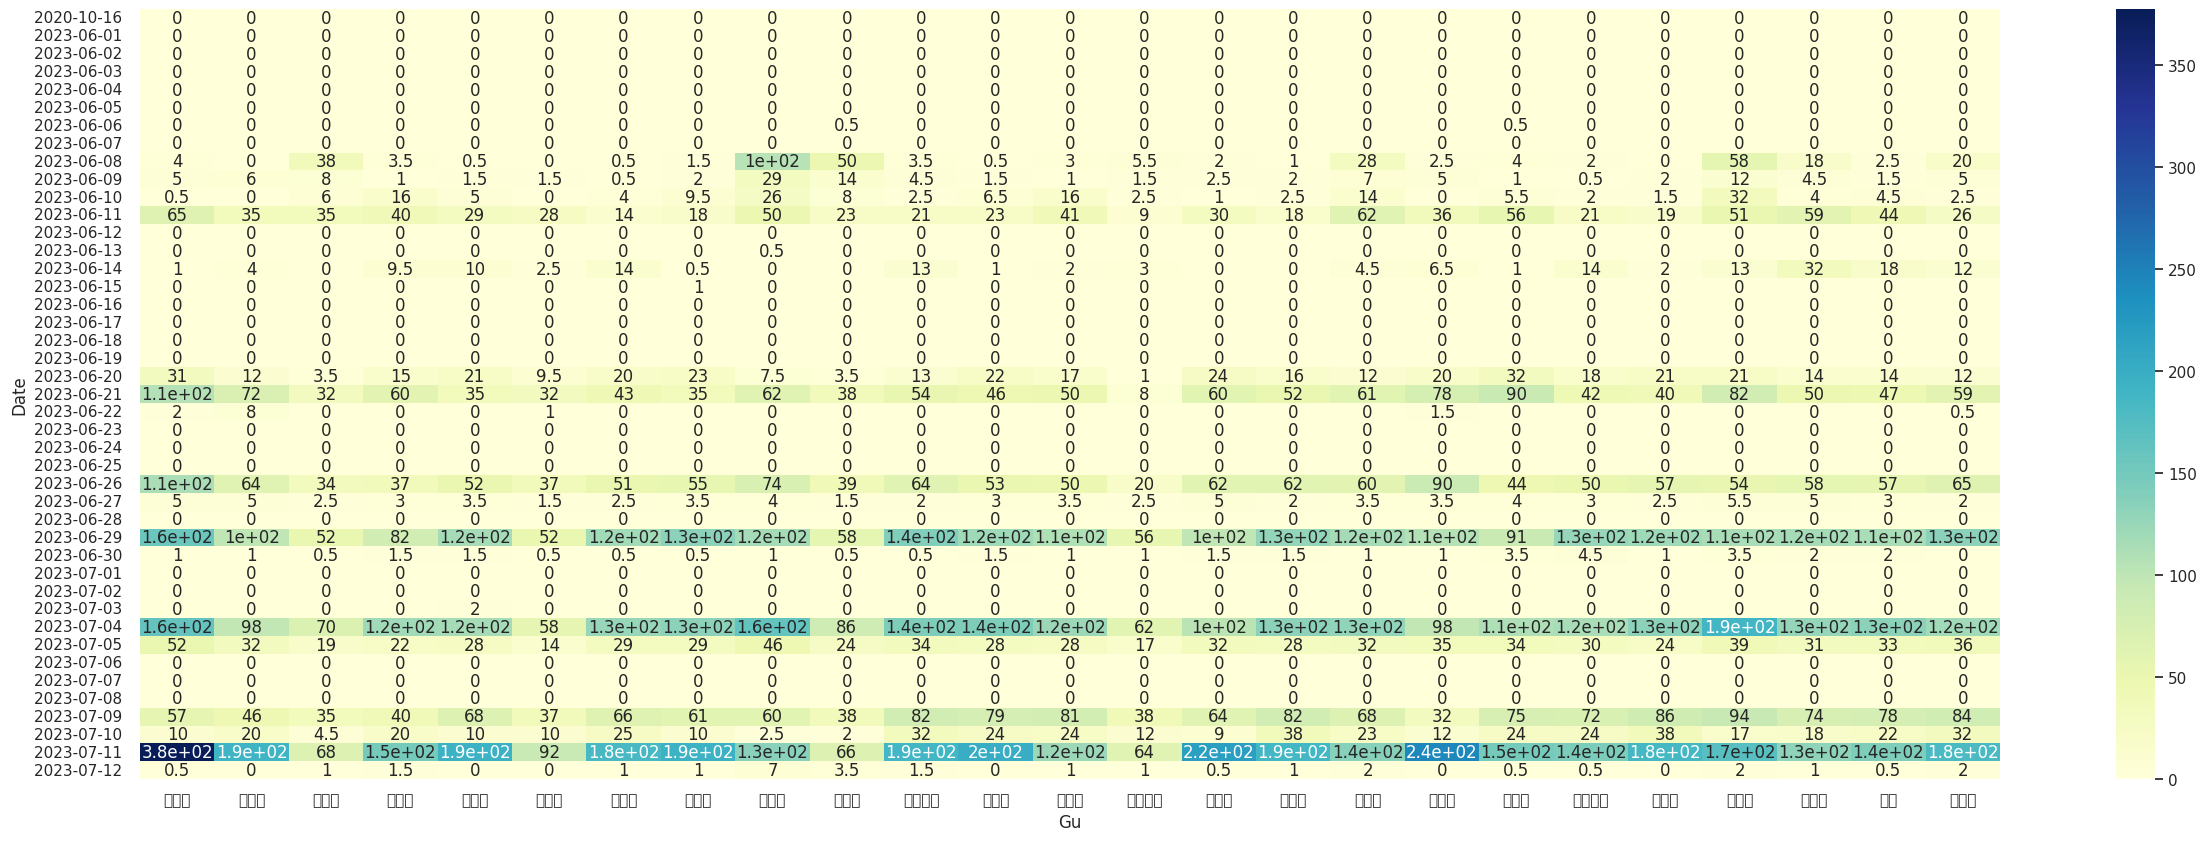

In [87]:
import seaborn as sns

# 그래프 크기 조절
sns.set(rc={'figure.figsize': (30, 10)})

# 시각화
sns.heatmap(pivot_seoulRain, annot=True, cmap='YlGnBu')
# plt.show()
# sns.heatmap(pivot_seoulRain, annot=True, cmap='YlGnBu')

### 특정 장소만 뽑아서 그래프 그리기
- 강남구

In [135]:
grouped_seoulRain.head()

,Date,Gu,DailyRain
25,2023-06-01,강남구,0.0
26,2023-06-01,강동구,0.0
27,2023-06-01,강북구,0.0
28,2023-06-01,강서구,0.0
29,2023-06-01,관악구,0.0


In [138]:
# unique_values = grouped_seoulRain['Date'].unique()
# len(unique_values)
# unique_values

In [145]:
# 'Gu' 컬럼에서 '강남구'와 일치하는 데이터만 필터링하여 새로운 데이터프레임 생성
filtered_df = grouped_seoulRain[grouped_seoulRain['Gu'] == '강남구'].reset_index(drop=True)
# filtered_df

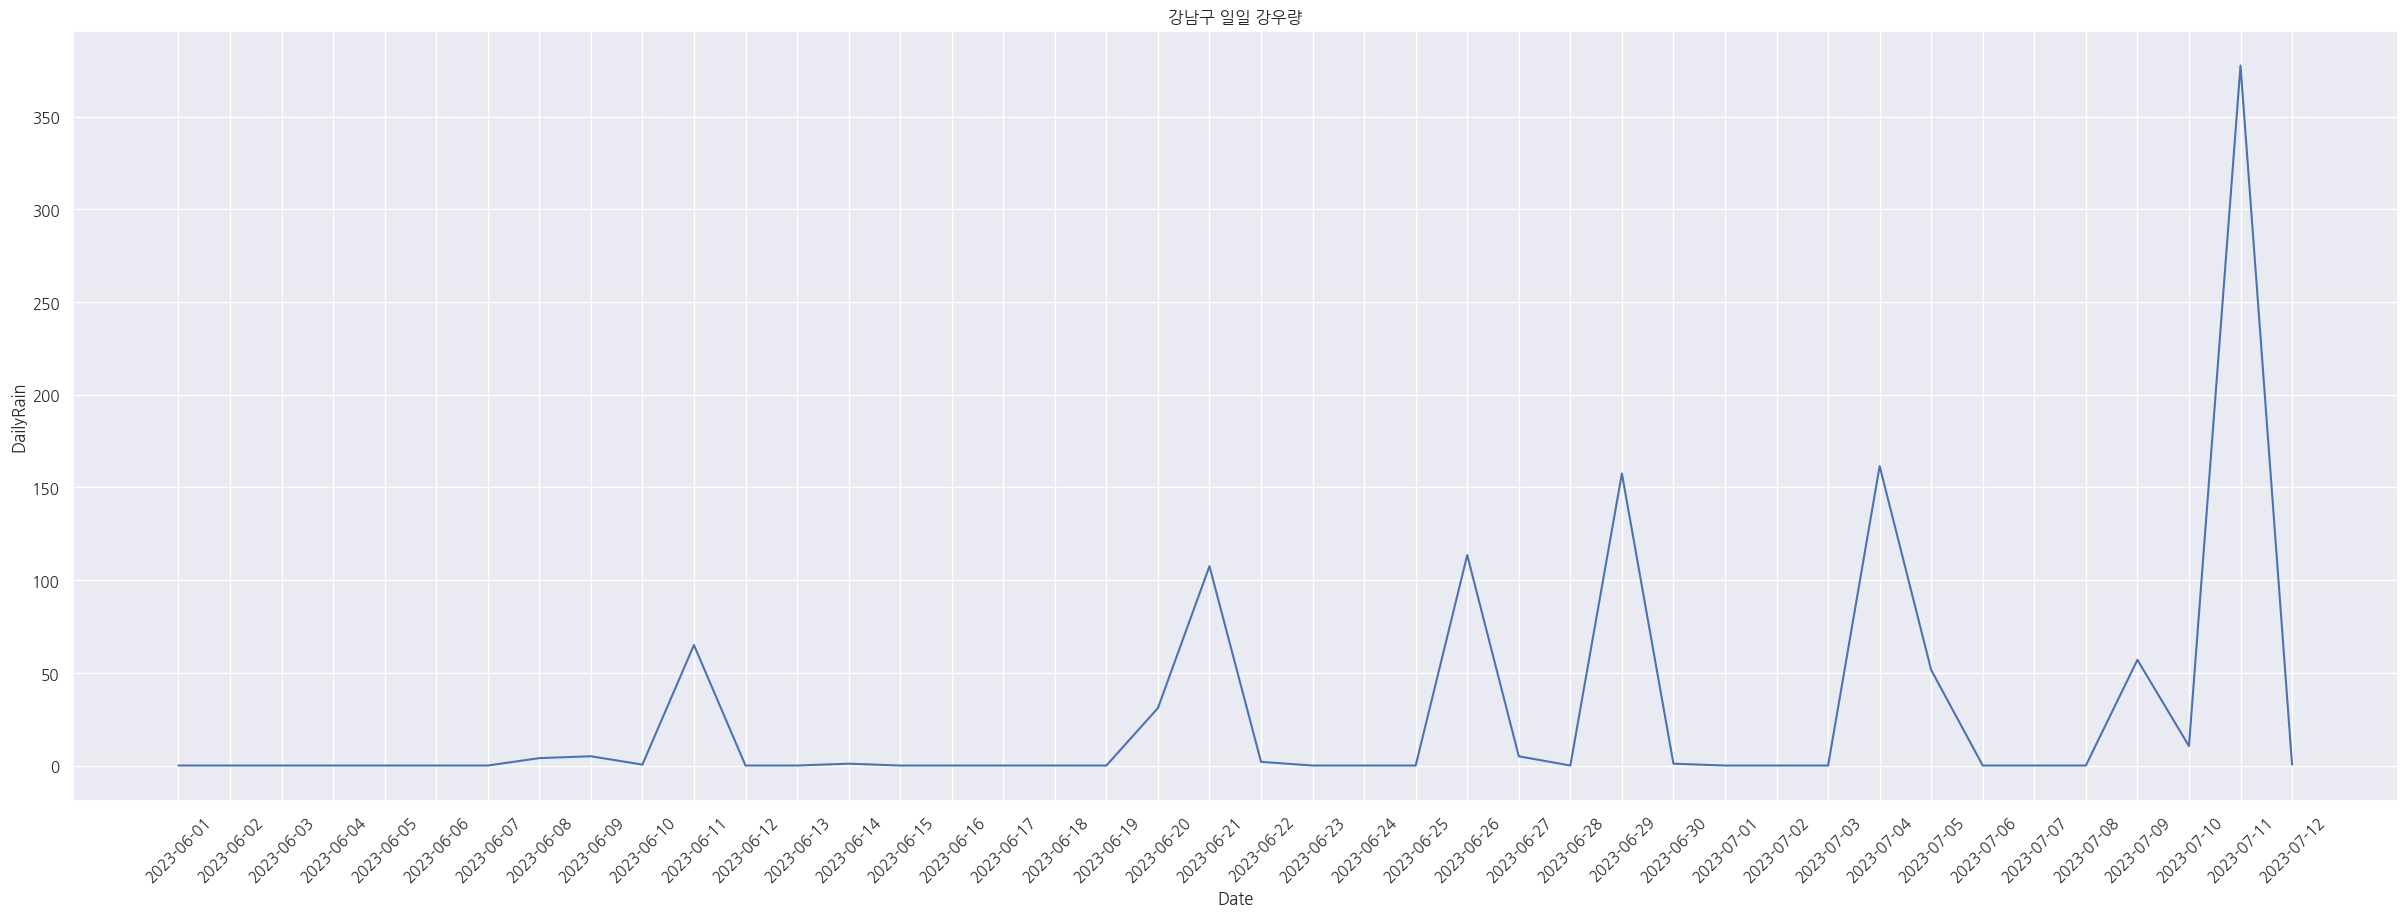

In [144]:
plt.plot(filtered_df['Date'], filtered_df['DailyRain'])
plt.xlabel('Date')
plt.ylabel('DailyRain')
plt.title('강남구 일일 강우량')
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 보이게 하기
plt.show()

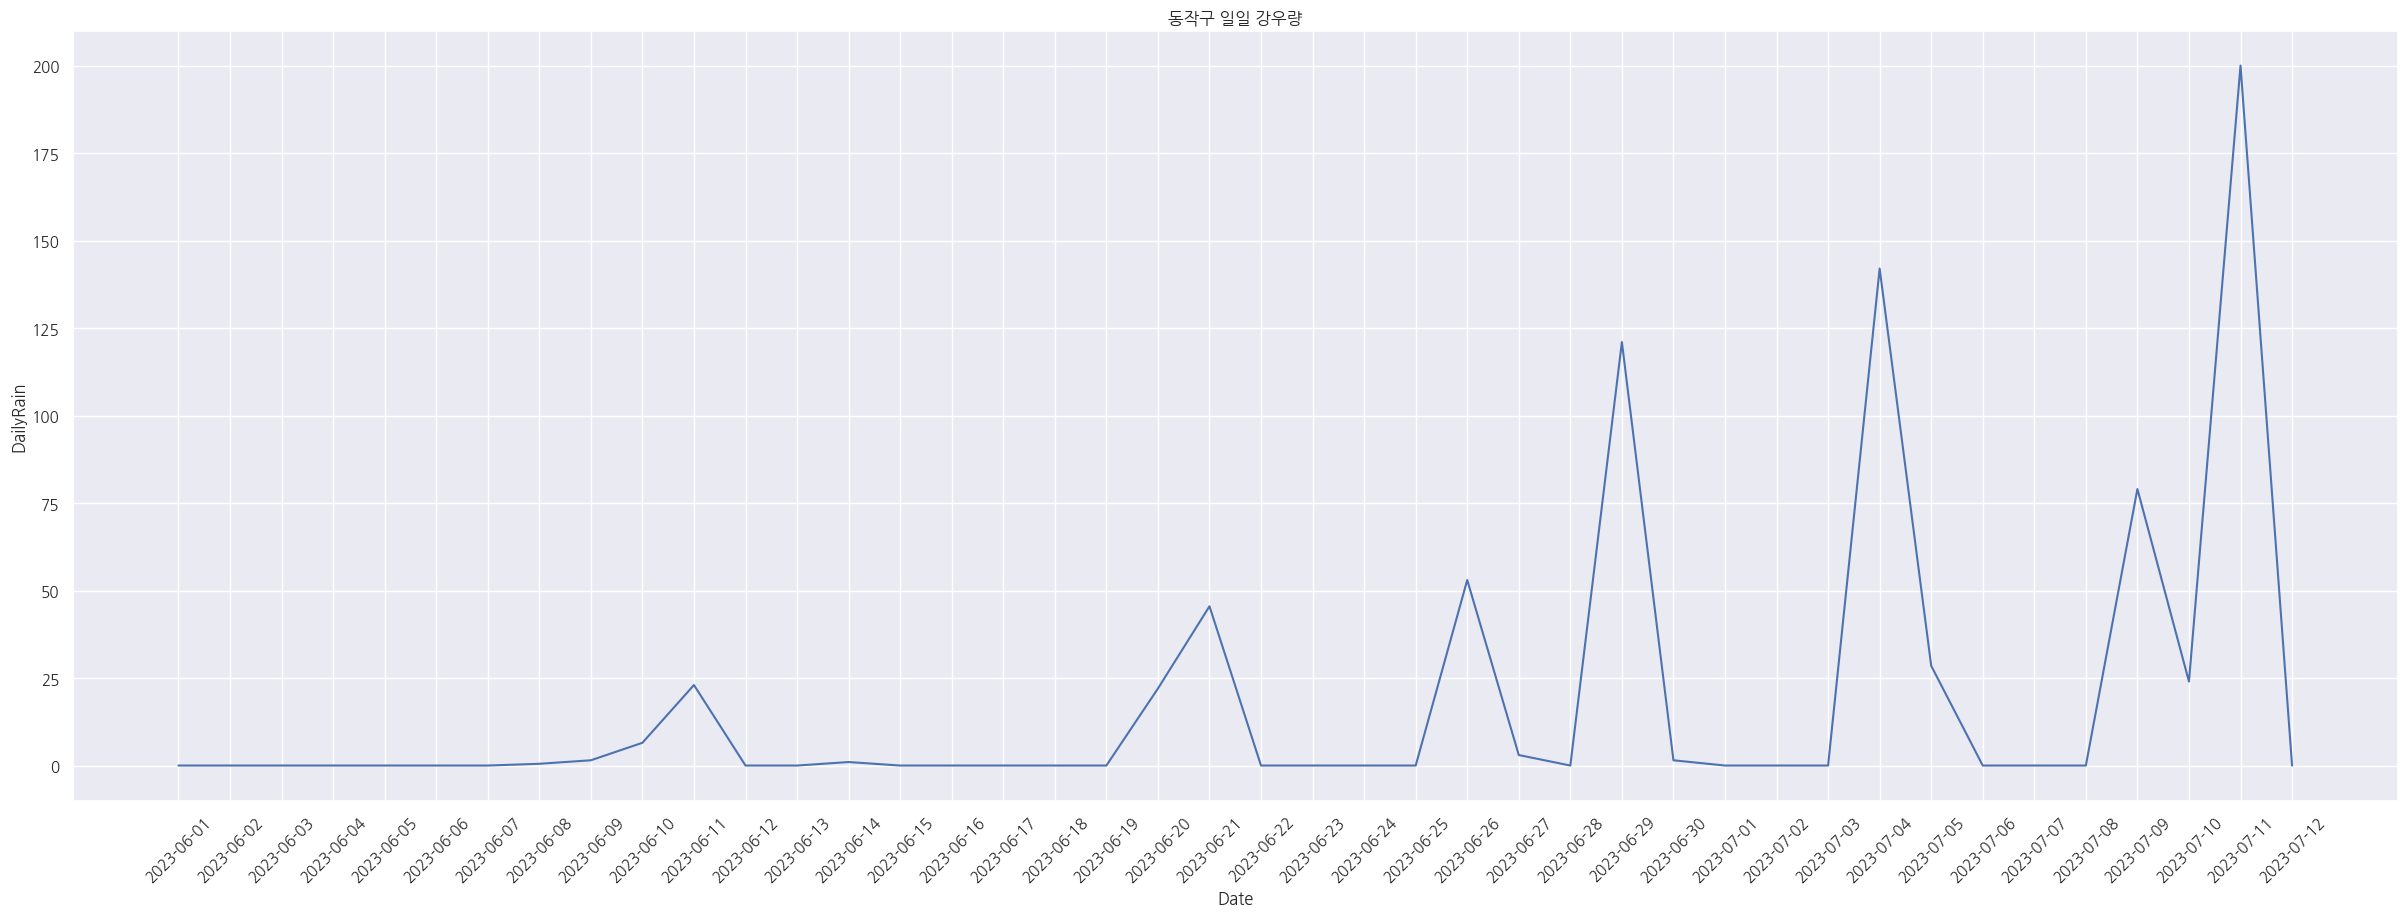

In [148]:
# 'Gu' 컬럼에서 '동작구'와 일치하는 데이터만 필터링하여 새로운 데이터프레임 생성
filtered_df = grouped_seoulRain[grouped_seoulRain['Gu'] == '동작구'].reset_index(drop=True)
# filtered_df
plt.plot(filtered_df['Date'], filtered_df['DailyRain'])
plt.xlabel('Date')
plt.ylabel('DailyRain')
plt.title('동작구 일일 강우량')
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 보이게 하기
plt.show()

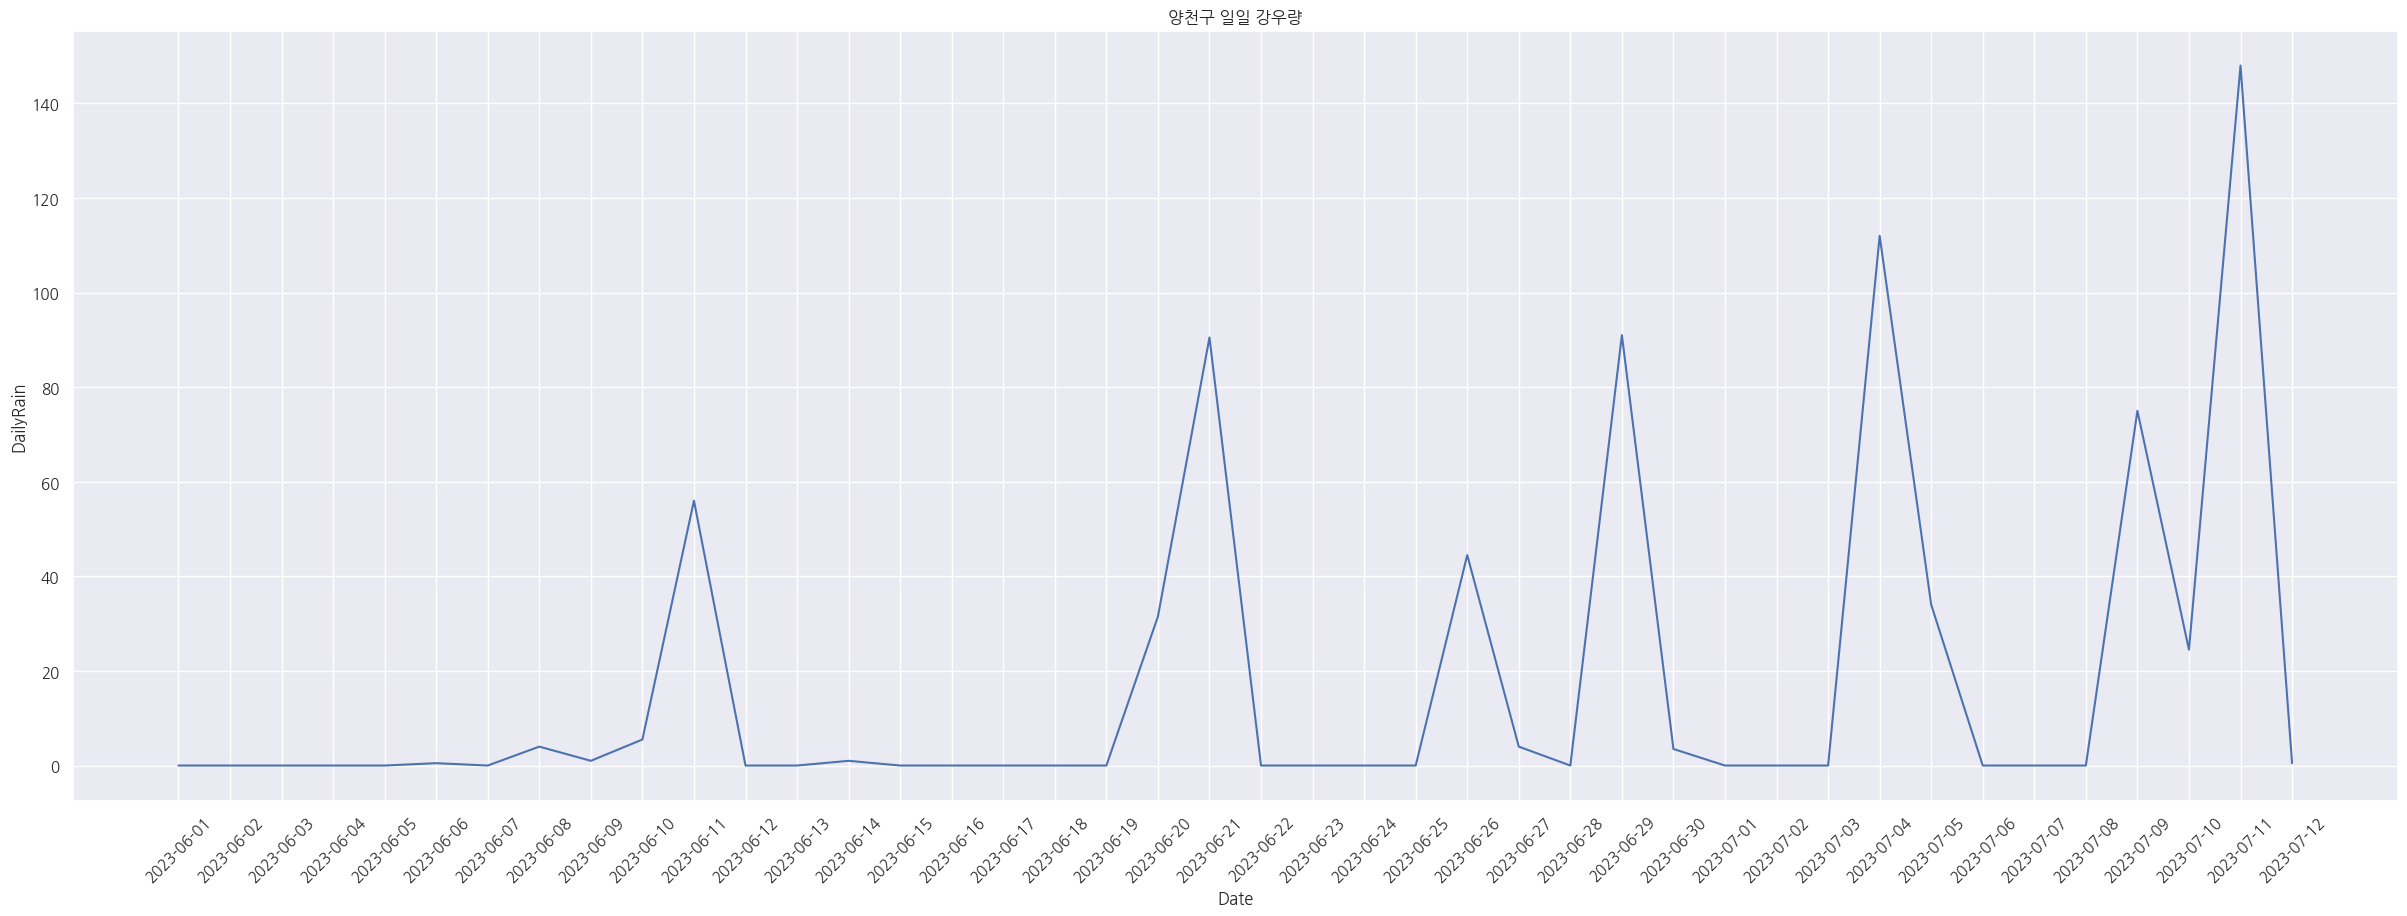

In [150]:
# 'Gu' 컬럼에서 '양천구'와 일치하는 데이터만 필터링하여 새로운 데이터프레임 생성
filtered_df = grouped_seoulRain[grouped_seoulRain['Gu'] == '양천구'].reset_index(drop=True)
# filtered_df
plt.plot(filtered_df['Date'], filtered_df['DailyRain'])
plt.xlabel('Date')
plt.ylabel('DailyRain')
plt.title('양천구 일일 강우량')
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 보이게 하기
plt.show()

In [ ]:
# 'Gu' 컬럼에서 '강남구'와 일치하는 데이터만 필터링하여 새로운 데이터프레임 생성
filtered_df = grouped_seoulRain[grouped_seoulRain['Gu'] == '양천구'].reset_index(drop=True)
# filtered_df
plt.plot(filtered_df['Date'], filtered_df['DailyRain'])
plt.xlabel('Date')
plt.ylabel('DailyRain')
plt.title('양천구 일일 강우량')
plt.xticks(rotation=45)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 보이게 하기
plt.show()